# MODELIZACIÓN PARA NO SUPERVISADO

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/pelop/OneDrive/Desktop/Curso Data Science Pedro/2 CURSO DATA SCIENCE/03_MACHINE_LEARNING/07_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [6]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660737,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.73,0.44,0
660728,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.10,0.30,0.12,0.73,0.44,0
660727,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.04,0.67,0.10,0.64,1.00,1
660719,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.02,0.13,0.05,0.55,0.67,0
660673,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.72,0.10,0.64,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579697,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.16,0.45,0.20,0.73,1.00,1
579642,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.04,0.78,0.10,0.64,1.00,0
579615,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.10,0.09,0.12,0.64,1.00,1


## MODELIZAR

### Crear el espacio de soluciones

In [7]:
min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [8]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [9]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [10]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,13216.21,0.19,1005.62,2.07
4,12453.61,0.20,810.70,1.85
5,11862.14,0.18,698.89,2.16
6,11437.97,0.16,615.83,2.13


#### Analizar los gráficos

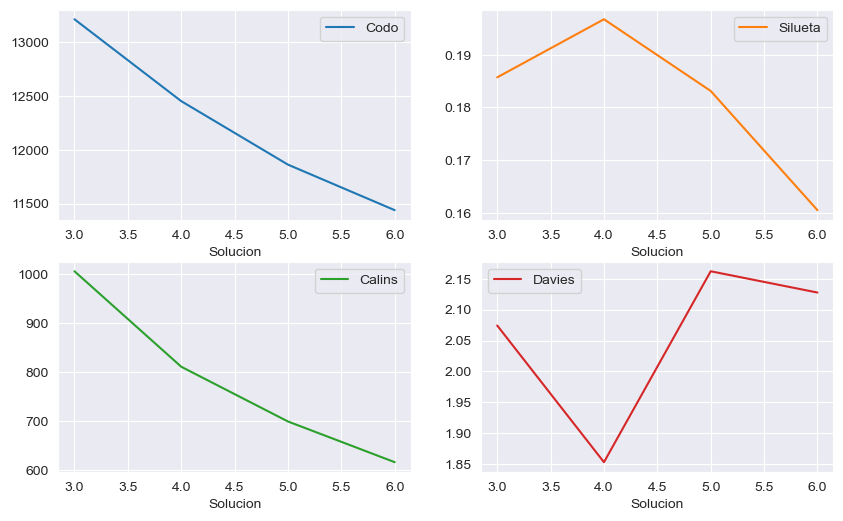

In [11]:
metricas.plot(subplots = True, figsize = (10,6), layout = (2,2), sharex = False);

### Segmentación final con la mejor solucion

In [12]:
mejor_solucion = 3

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=3, n_init=10)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [13]:
df['segmento'] = cluster.predict(df)

## PERFILAR LOS SEGMENTOS

In [14]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2
origen_API,0.000000,0.947131,0.029314
origen_Landing Page Submission,0.883752,0.000000,0.964049
origen_Lead Add Form,0.110304,0.036750,0.006637
origen_OTROS,0.005945,0.016119,0.000000
fuente_Chat,0.000661,0.177950,0.016593
fuente_Direct Traffic,0.188904,0.039974,0.674226
fuente_Google,0.630779,0.488072,0.091814
fuente_OTROS,0.015192,0.070922,0.007743
fuente_Organic Search,0.058124,0.191489,0.202987
fuente_Reference,0.106341,0.031593,0.006637


**ANÁLISIS CON 3 SEGMENTOS:**

Vemos que en la variable compra prácticamente los 3 segmentos convierten igual. Esto ya nos indica a primeras que la segmentación elegida no es muy buena. Vamos a probar con 4.

In [15]:
mejor_solucion = 4

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
#Entrenar
cluster.fit(df)

df['segmento'] = cluster.predict(df)

df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3
origen_API,0.000000,0.027888,0.947131,0.031095
origen_Landing Page Submission,0.883752,0.965139,0.000000,0.962687
origen_Lead Add Form,0.110304,0.006972,0.036750,0.006219
origen_OTROS,0.005945,0.000000,0.016119,0.000000
fuente_Chat,0.000661,0.014940,0.177950,0.018657
fuente_Direct Traffic,0.188904,0.662351,0.039974,0.689055
fuente_Google,0.630779,0.097610,0.488072,0.084577
fuente_OTROS,0.015192,0.004980,0.070922,0.011194
fuente_Organic Search,0.058124,0.213147,0.191489,0.190299
fuente_Reference,0.106341,0.006972,0.031593,0.006219


**ANÁLISIS CON 4 SEGMENTOS:**

La variable compra mejora con un grupo que convierte mucho, pero los otros 3 son prácticamente iguales. Vamos a probar eliminando algunas variables del análisis. Las menos relevantes podrían ser el *origen* y la *fuente*.

In [16]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)
df.drop(columns = ['origen_API','origen_Landing Page Submission','origen_Lead Add Form','origen_OTROS',
                   'fuente_Chat','fuente_Direct Traffic','fuente_Google','fuente_OTROS','fuente_Organic Search','fuente_Reference'],
                    inplace = True)

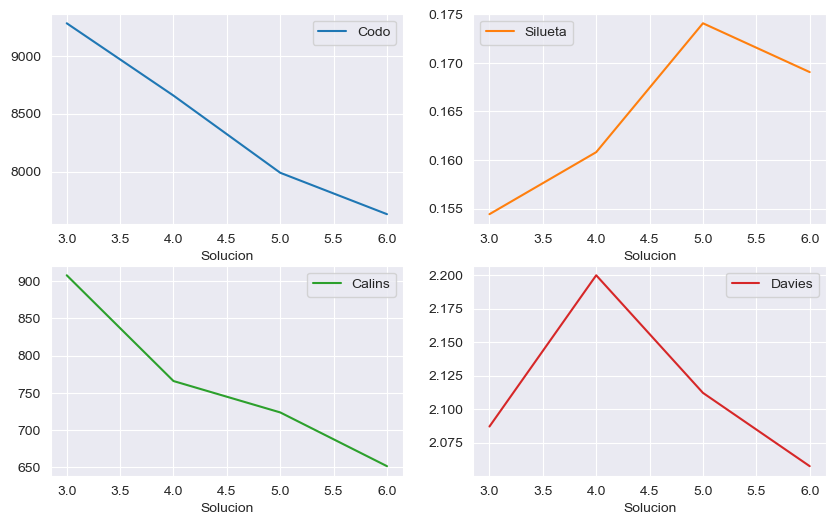

In [17]:
min_k = 3
max_k = 7
soluciones = list(range(min_k,max_k))

codo = []
silueta = []
calins = []
davies = []

for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

metricas = pd.DataFrame({'Solucion':soluciones,'Codo': codo,'Silueta':silueta,'Calins':calins,'Davies':davies}).set_index('Solucion')
metricas.plot(subplots = True, figsize = (10,6), layout = (2,2), sharex = False);

In [18]:
mejor_solucion = 6

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
#Entrenar
cluster.fit(df)

df['segmento'] = cluster.predict(df)

df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4,5
ult_actividad_Chat Conversation,0.050380,0.000000,0.000000,0.041711,0.192308,0.021739
ult_actividad_Converted to Lead,0.067490,0.000000,0.000000,0.115508,0.119780,0.033816
ult_actividad_Email Link Clicked,0.038973,0.000000,0.000000,0.051337,0.050549,0.028986
ult_actividad_Email Opened,0.647338,1.000000,0.000000,0.000000,0.463736,0.338164
ult_actividad_OTROS,0.087452,0.000000,0.000000,0.049198,0.064835,0.096618
ult_actividad_Page Visited on Website,0.108365,0.000000,0.000000,0.154011,0.108791,0.057971
ult_actividad_SMS Sent,0.000000,0.000000,1.000000,0.588235,0.000000,0.422705
"ambito_Banking, Investment And Insurance",0.063688,0.050584,0.050569,0.065241,0.000000,0.048309
ambito_Business Administration,0.067490,0.068742,0.046776,0.070588,0.000000,0.065217
ambito_Finance Management,0.185361,0.156939,0.117573,0.144385,0.000000,0.157005


**ANÁLISIS CON 6 SEGMENTOS SIN ORIGEN NI FUENTE:**

La variable compra ahora se diferencia mejor, pero siguen sin verse divisiones claras en el resto de métricas. Así repitiendo este proceso de sacar y meter variables y probar diferentes segmentaciones vamos optimizando poco a poco la solución y el algoritmo. En este caso la mejor solución que se ha encontrado es la siguiente.

In [19]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)
df.drop(columns = ['fuente_Chat',
                   'fuente_Direct Traffic',
                   'fuente_Google',
                   'fuente_OTROS',
                   'fuente_Organic Search',
                   'fuente_Reference',
                   'ambito_Banking, Investment And Insurance',
                   'ambito_Business Administration',
                   'ambito_Finance Management',
                   'ambito_Human Resource Management',
                   'ambito_IT Projects Management',
                   'ambito_International Business',
                   'ambito_Select',
                   'ambito_Supply Chain Management',
                   'ambito_Select',
                   'ambito_Supply Chain Management',
                   'ambito_Travel and Tourism',
                   'ambito_Marketing Management',
                   'ambito_Media and Advertising',
                   'ambito_OTROS',
                   'ambito_Operations Management',
                   'descarga_lm_No',
                   'descarga_lm_Yes',
                   'visitas_total_mms',
                   'paginas_vistas_visita_mms'],
                    inplace = True)

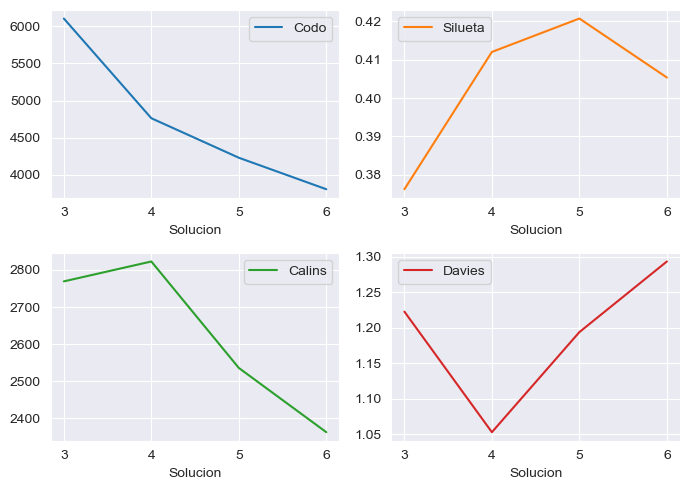

In [48]:
min_k = 3
max_k = 7
soluciones = list(range(min_k,max_k))

codo = []
silueta = []
calins = []
davies = []

for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

metricas = pd.DataFrame({'Solucion':soluciones,'Codo': codo,'Silueta':silueta,'Calins':calins,'Davies':davies}).set_index('Solucion')
metricas.plot(subplots = True, figsize = (7,5), layout = (2,2), sharex = False);
plt.tight_layout()

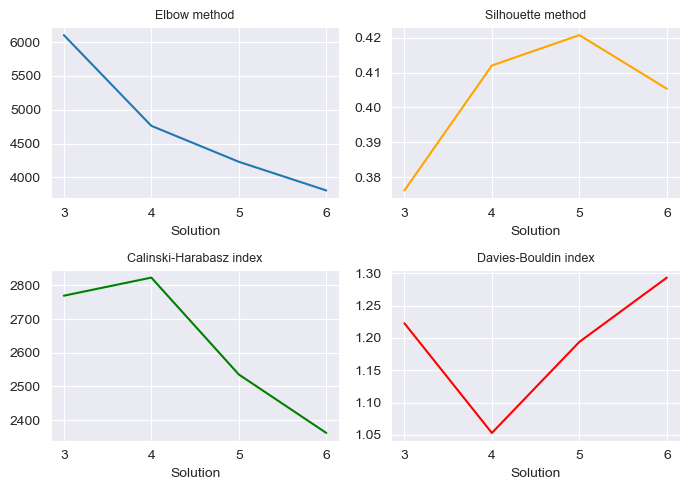

In [47]:
f, ax = plt.subplots(2,2,figsize=(7,5), dpi = 100)
f1 = sns.lineplot(ax = ax[0,0], data = metricas, x = metricas.index, y = 'Codo');
f1.set_title('Elbow method', size = 9); f1.set_ylabel(''); f1.set_xlabel('Solution')
f2 = sns.lineplot(ax = ax[0,1], data = metricas, x = metricas.index, y = 'Silueta', color = 'orange');
f2.set_title('Silhouette method', size = 9); f2.set_ylabel(''); f2.set_xlabel('Solution')
f3 = sns.lineplot(ax = ax[1,0], data = metricas, x = metricas.index, y = 'Calins', color = 'green');
f3.set_title('Calinski-Harabasz index', size = 9); f3.set_ylabel(''); f3.set_xlabel('Solution')
f4 = sns.lineplot(ax = ax[1,1], data = metricas, x = metricas.index, y = 'Davies', color = 'red');
f4.set_title('Davies-Bouldin index', size = 9); f4.set_ylabel(''); f4.set_xlabel('Solution')
plt.tight_layout()
fig = f4.get_figure()
fig.savefig("exhibit_3.png")

In [26]:
metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,6104.68,0.38,2769.22,1.22
4,4762.98,0.41,2822.90,1.05
5,4231.34,0.42,2535.60,1.19
6,3807.41,0.41,2362.26,1.29


In [21]:
mejor_solucion = 4

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
#Entrenar
cluster.fit(df)

df['segmento'] = cluster.predict(df)

df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3
origen_API,0.208155,0.000000,0.000000,0.982759
origen_Landing Page Submission,0.517167,0.952923,0.966463,0.000000
origen_Lead Add Form,0.270386,0.037965,0.028049,0.009655
origen_OTROS,0.004292,0.009112,0.005488,0.007586
ult_actividad_Chat Conversation,0.015021,0.000000,0.035976,0.144828
ult_actividad_Converted to Lead,0.034335,0.000000,0.110366,0.072414
ult_actividad_Email Link Clicked,0.027897,0.000000,0.046341,0.040000
ult_actividad_Email Opened,0.326180,1.000000,0.000000,0.375862
ult_actividad_OTROS,0.165236,0.000000,0.057317,0.045517
ult_actividad_Page Visited on Website,0.053648,0.000000,0.147561,0.078621


Con esta segmentación y selección de variables vemos 4 grupos:
* **Grupo que compra mucho:** Este perfil viene de rellenar el Lead add form y responden positivamente a los correos que se les envían. Los SMS no funcionan en este grupo y esta constituido mayormente por gente empleada. También permanecen mayor tiempo en la página web y realizan un mayor número de visitas.
* **Grupo que no compra nada:** Este perfil viene mayormente de la Landing Page Submission. Los emails no funcionan en este grupo pese a ser bien recibidos. La mayor parte de este perfil son personas desempleadas, que no dedican mucho tiempo a visitar la página web.
* **Grupos intermedio alto:** Este perfil también viene de la Landing Page Submission al igual que el que no compra, sin embargo el SMS funciona perfectamente para ellos. Hacen compras moderadas.
* **Grupo intermedio bajo:** Este perfil viene exclusivamente del servidor API y responden bien a la actividad a través del chat. Son mayormente desempleados y no hacen muchas visitas.

Resumiendo encontramos 4 grupos:
* Perfil bueno - Trabajadores captados por email y que pasan tiempo visitando la página web.
* Perfil intermedio alto - Mezcla de empleados y desempleados (mayormente desempleados) que vienen de la Landing Page Submission. Responden al SMS.
* Perfil intermedio bajo - Desempleados que vienen de la API, no tienen mucha actividad en la web pero el chat funciona para ellos.
* Perfil malo - Desempleados que vienen de la Landing Page Submission. No responden al SMS y pasan muy poco tiempo en la web.

In [120]:
df.segmento.value_counts(normalize = True).sort_index()

segmento
0   0.27
1   0.34
2   0.29
3   0.09
Name: proportion, dtype: float64

* El 16% de los leads son de muy alta calidad.
* Al 30% hay que dejar de enviarles publicidad pues no responden de ninguna manera.
* Hay un 54% de leads de calidad media con los que se puede seguir trabajando.

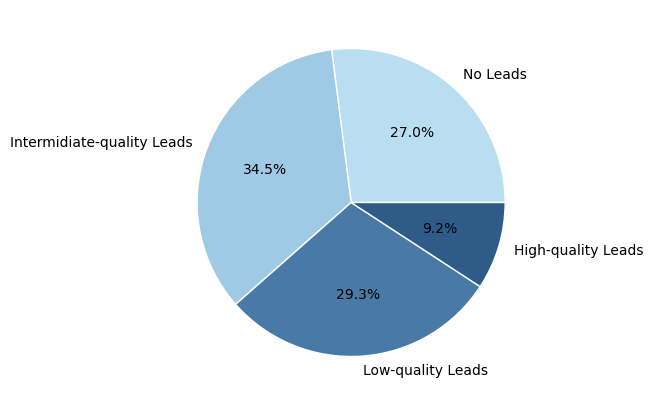

In [128]:
f, ax = plt.subplots(figsize = (10,5))
y = ['No Leads','Intermidiate-quality Leads','Low-quality Leads','High-quality Leads']
colores = ["#B9DDF1", "#9FCAE6", "#497AA7", "#2E5B88"]
ax.pie(x = df.segmento.value_counts(normalize = True).sort_index(), labels = y, autopct = '%1.1f%%',
      colors = colores, wedgeprops = {"linewidth": 1, "edgecolor": "white"});